In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.manifold import TSNE


The Correlation Matrix denotes the inter correlation of all columns with each other as shown below.

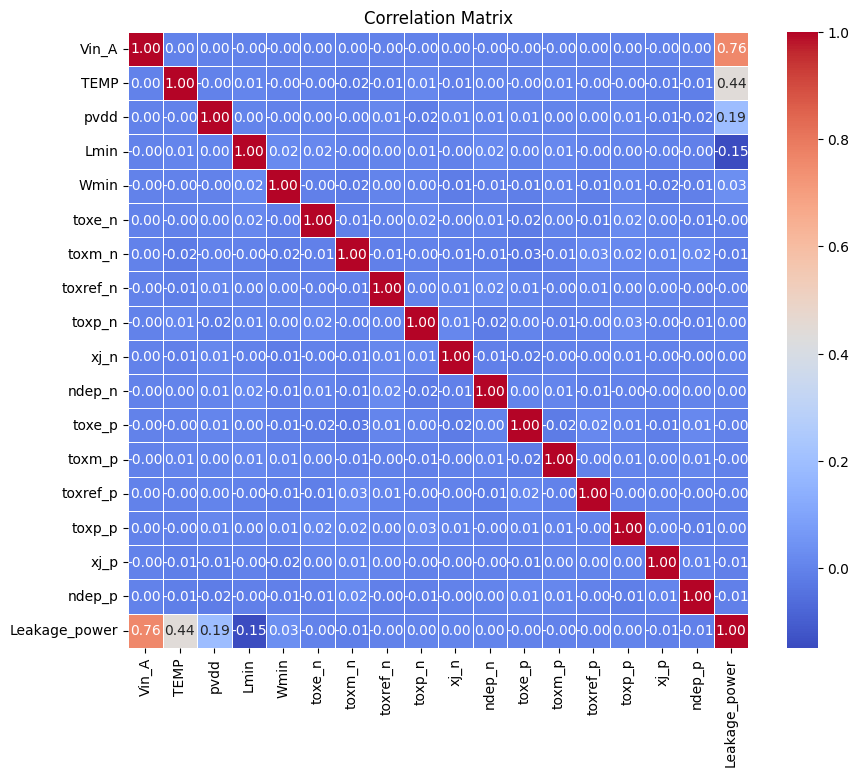

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Required Libraries

# 2. Load Your Data
# Example:
df = pd.read_csv('INVERTER_leakage.csv')

# 3. Calculate Correlation
correlation_matrix = df.corr()

# 4. Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
#plt.show()
file_path = r'C:\Users\123\Documents\DVD_proj2_EDA\PLOTS_data_analytics\Correlation_Matrix.png'

# Save the plot
plt.savefig(file_path)
plt.show()


In [6]:
target_column = 'Leakage_power'
correlation_with_target = correlation_matrix[target_column].drop(target_column)
print(correlation_with_target)


Vin_A       0.758489
TEMP        0.443149
pvdd        0.191585
Lmin       -0.147941
Wmin        0.032053
toxe_n     -0.002206
toxm_n     -0.009699
toxref_n   -0.000849
toxp_n      0.004461
xj_n        0.003176
ndep_n      0.002255
toxe_p     -0.000265
toxm_p     -0.000423
toxref_p   -0.001174
toxp_p      0.000862
xj_p       -0.007834
ndep_p     -0.008412
Name: Leakage_power, dtype: float64


The plot below however shows only the correlation of all input paramater columns with the target column i.e leakage power only. 


Note: If the correlation is positive then the leakage_power increases with increase in that parameter and if it is negative then leakage_power increases with decrease in that parameter

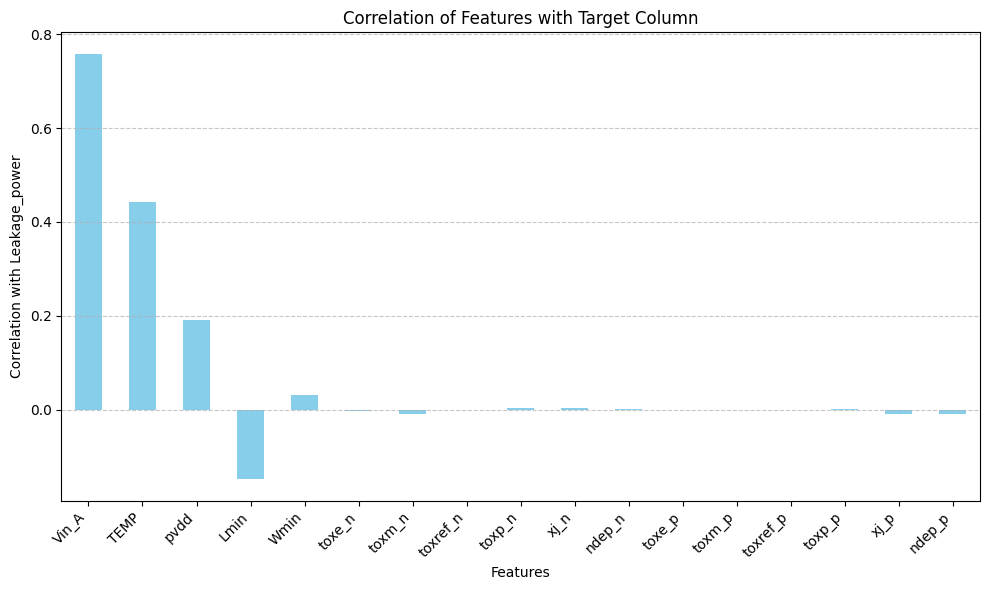

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and target_column is the name of your target column

# Calculate Correlation
correlation_with_target = df.corr()[target_column].drop(target_column)

# Visualize the Correlation
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target Column')
plt.xlabel('Features')
plt.ylabel('Correlation with Leakage_power')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
file_path = r'C:\Users\123\Documents\DVD_proj2_EDA\PLOTS_data_analytics\Corr_with_leakage.png'

# Save the plot
plt.savefig(file_path)
plt.show()


PCA Analysis on the INVERTER_delay.csv dataset

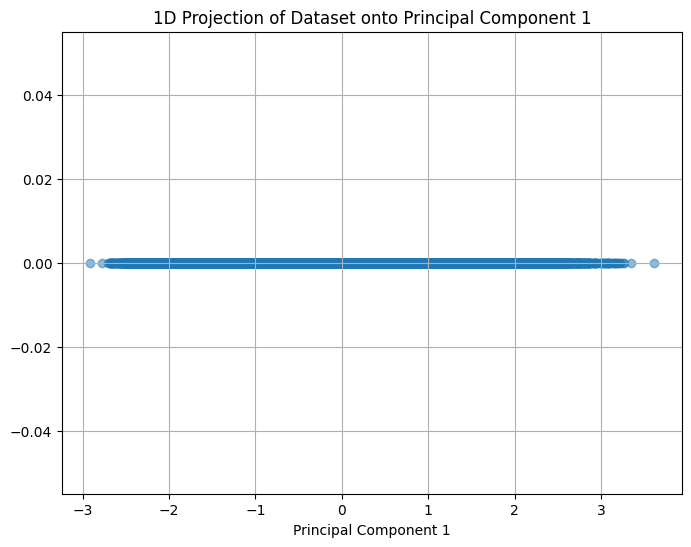

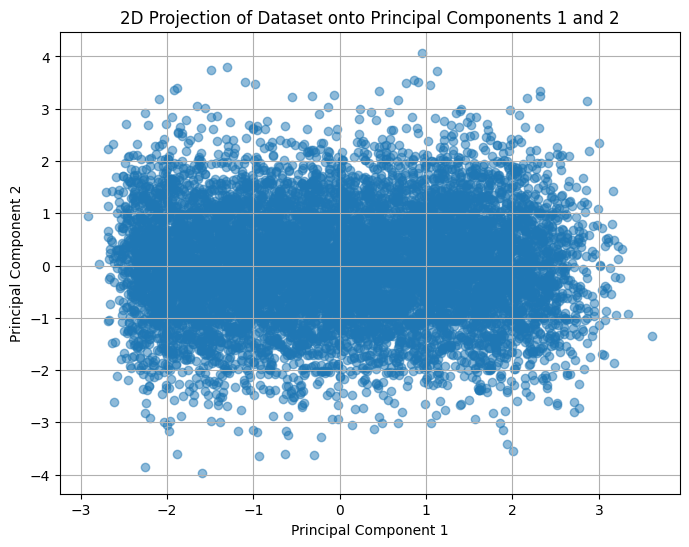

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('INVERTER_delay.csv')

# Separate features from the target variable (if applicable)
# For example, if the last column is the target variable, you can do:
X = data.iloc[:, :-2]  # Features
# print(X.head())

y = data.iloc[:, -1]   # Target variable
# print(y.head())
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data to the new PCA space
pca_data = pca.transform(scaled_data)

# Plot 1D projection
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], [0] * len(pca_data), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.title('1D Projection of Dataset onto Principal Component 1')
plt.grid(True)
plt.show()

# Plot 2D projection (first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Dataset onto Principal Components 1 and 2')
plt.grid(True)
plt.show()


Explained Variance Ratio  v/s  No. of Components Plot

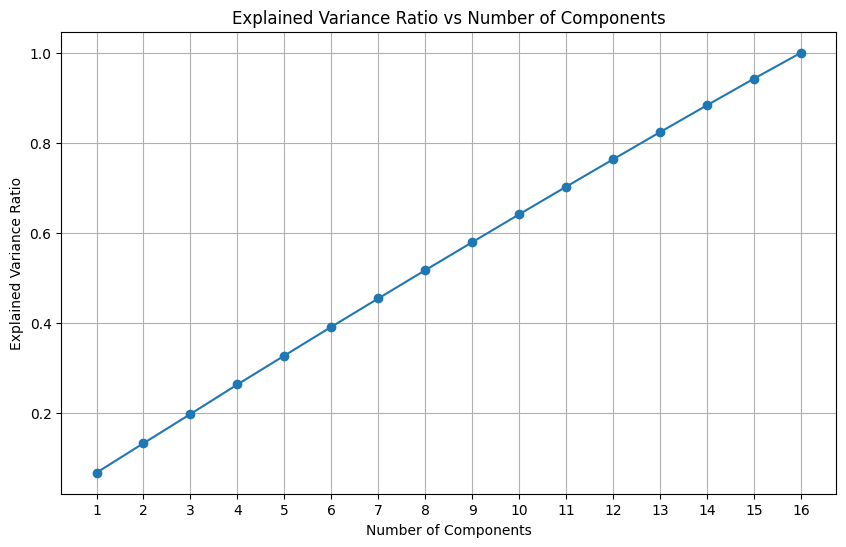

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('INVERTER_delay.csv')

# Separate features from the target variable (if applicable)
# For example, if the last column is the target variable, you can do:
X = data.iloc[:, :-2]  # Features
# print(X.head())

y = data.iloc[:, -1]   # Target variable
# print(y.head())
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Initialize lists to store explained variance and components
explained_variances = []
components_range = range(1, 17) # only the input parameter columns

# Loop over different numbers of components
for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    # Get explained variance ratio
    explained_variances.append(sum(pca.explained_variance_ratio_))

# Plot explained variance ratio vs number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.xticks(components_range)
plt.grid(True)
plt.show()


PCA Analysis for INVERTER_leakage.csv dataset

0    6.047835e-08
1    4.915883e-07
2    3.856550e-08
3    3.703095e-07
4    1.928227e-07
Name: Leakage_power, dtype: float64


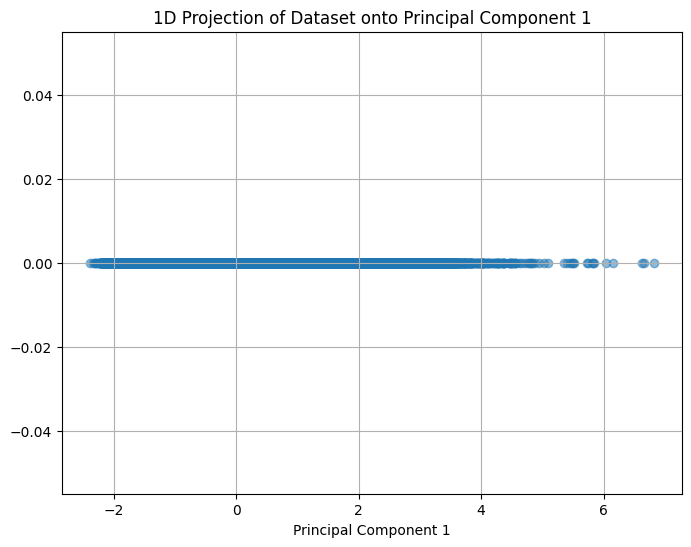

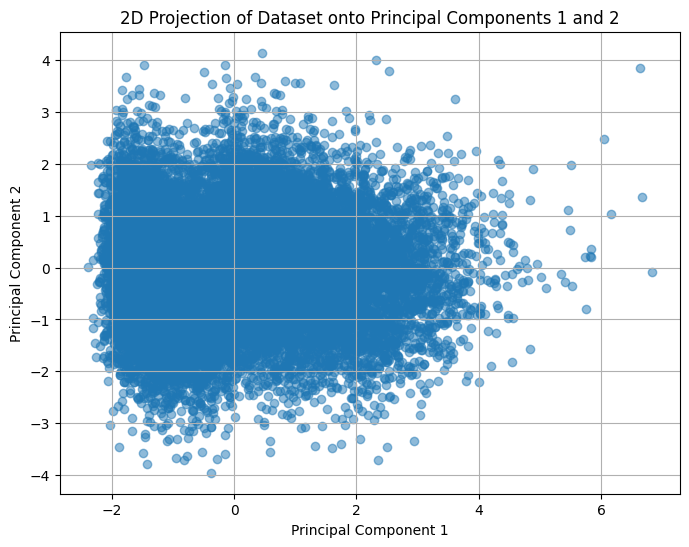

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('INVERTER_leakage.csv')

# Separate features from the target variable (if applicable)
# For example, if the last column is the target variable, you can do:
X = data.iloc[:, :-1]  # Features
# print(X.head())

y = data.iloc[:, -1]   # Target variable
print(y.head())
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data to the new PCA space
pca_data = pca.transform(scaled_data)

# Plot 1D projection
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], [0] * len(pca_data), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.title('1D Projection of Dataset onto Principal Component 1')
plt.grid(True)
plt.show()

# Plot 2D projection (first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Dataset onto Principal Components 1 and 2')
plt.grid(True)
plt.show()


Explained Variance Ratio Plot for INVERTER_leakage.csv

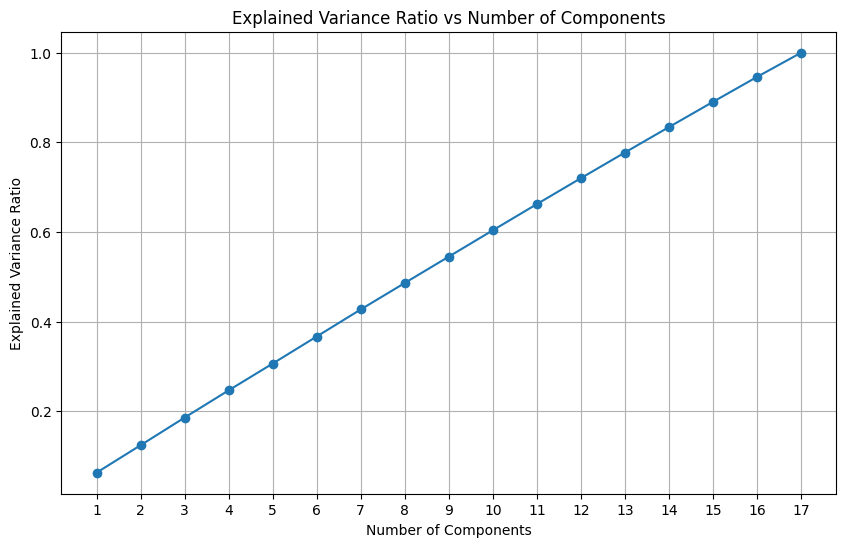

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('INVERTER_leakage.csv')

# Separate features from the target variable (if applicable)
# For example, if the last column is the target variable, you can do:
X = data.iloc[:, :-1]  # Features
# print(X.head())

y = data.iloc[:, -1]   # Target variable
# print(y.head())

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Initialize lists to store explained variance and components
explained_variances = []
components_range = range(1, 18)

# Loop over different numbers of components
for n_components in components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    # Get explained variance ratio
    explained_variances.append(sum(pca.explained_variance_ratio_))

# Plot explained variance ratio vs number of components
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.xticks(components_range)
plt.grid(True)
plt.show()


In [12]:
raw_df = pd.read_csv('INVERTER_leakage.csv')
#raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df = raw_df.iloc[:, :-1]
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)
raw_df.shape
scaler = StandardScaler()
data_scaled = scaler.fit_transform(raw_df)


C:\Users\123\AppData\Local\Temp\ipykernel_49580\3121454315.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df.fillna(method ='ffill', inplace = True)


Below is the TSNE Visualization of 2 components

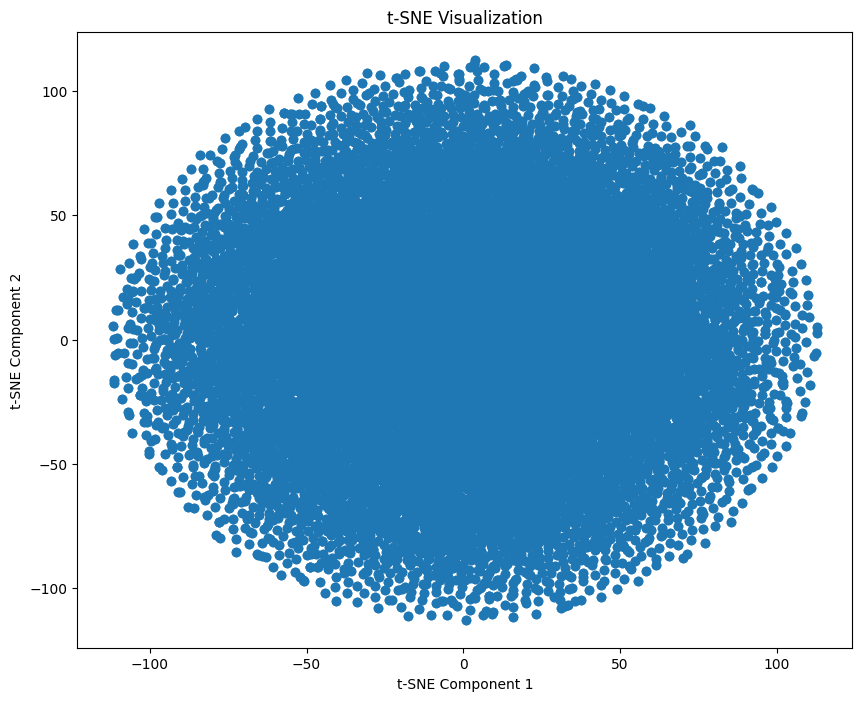

In [13]:
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data_scaled)
tsne_df = pd.DataFrame(data=tsne_result, columns=['tsne1', 'tsne2'])

# Plot t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


GMM Clustering for INVERTER_leakage dataset for 22nm tech node

In [18]:
raw_df = pd.read_csv('INVERTER_leakage.csv')
#raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df = raw_df.iloc[:, :-1]
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)
raw_df.shape


C:\Users\123\AppData\Local\Temp\ipykernel_48496\2231022820.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df.fillna(method ='ffill', inplace = True)


(20000, 17)

In [19]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.400386,-0.088132
1,-0.074716,-0.136543


In [20]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)


GaussianMixture(n_components=3)

Visualizing the clustering 

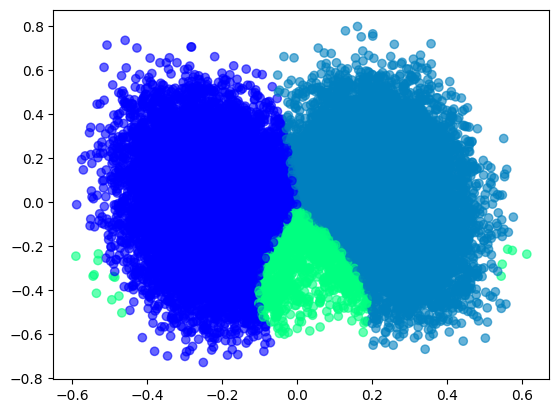

In [21]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

In [22]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [23]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=8
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

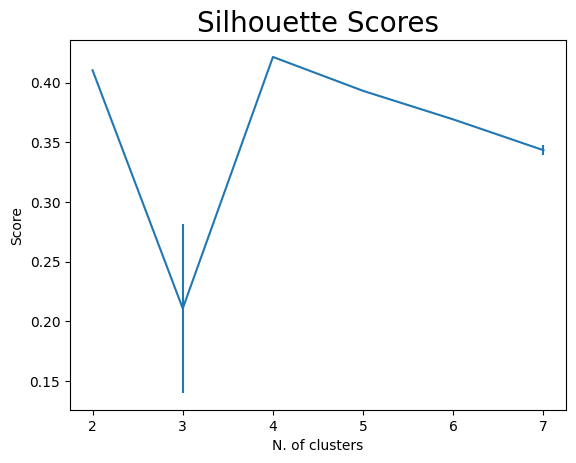

In [24]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

The closer Silhouette Score is to 1 the better the clustering and hence, we have chosen the no. of clusters =4 for Inverter for 22nm technology node.

In [25]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

Calculating distance between Train and Test GMMs => the lesser the Jensen-Shannon metric distance between them the better the clustering.

In [30]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
n_clusters=np.arange(2, 8)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X_principal, test_size=0.9)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

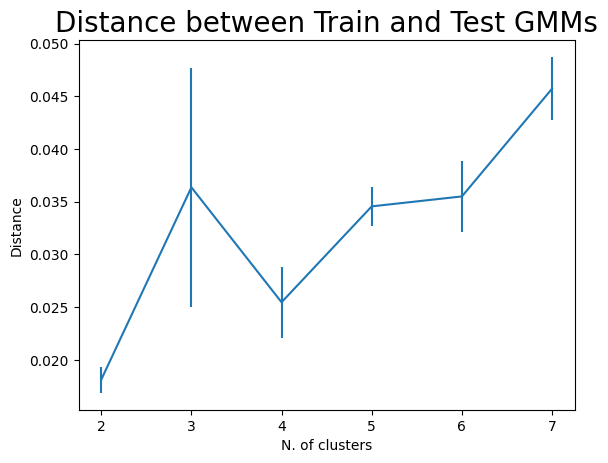

In [31]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

 Bayesian information criterion (BIC):

This criterion gives us an estimation on how much is good the GMM in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have.

In [32]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=8
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        
        tmp_bic.append(gmm.bic(X_principal))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

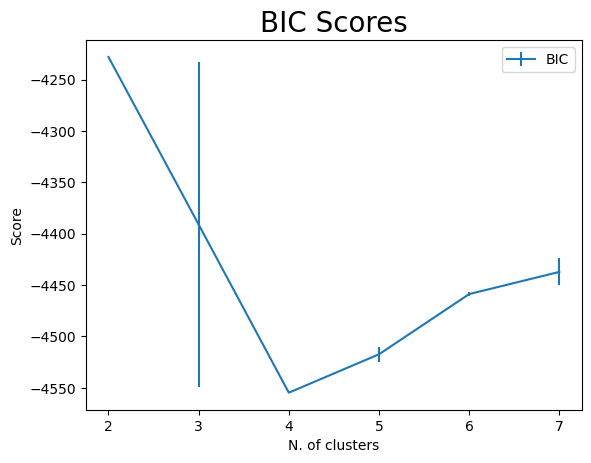

In [33]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

This plot depicts that we should choose no. of clusters as 4 since BIC is least.